In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as de
import os

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [54]:
win_path = 'C:/Users/noname/Desktop/wuzhatn'
mac_path = '/Users/noname/documents/github/wuzhatn'
main = win_path if os.path.exists(win_path) else mac_path
raw = main + '/raw'

years = range(2011,2019,1)
y2u = range(2014,2019,1)

In [55]:
a = pd.read_excel(f'{raw}/일별평균대기오염도_2018.xlsx', usecols=[0,1,6,7])
t = a.columns[3]
print(len(t))
unit = t[-4:-1]
print(unit)

10
㎍/㎥


In [56]:
all_ds = {}
for y in years:
    all_ds[y] = pd.read_excel(f'{raw}/일별평균대기오염도_{str(y)}.xlsx', usecols=[0,1,6,7])
    all_ds[y].dropna(axis=1, how='all', inplace=True)

In [57]:
ds = pd.DataFrame()
for y in y2u:
    ds = ds.append(all_ds[y])

ds.columns = ['dt','loca','pm10','pm25']
ds['dt'] = pd.to_datetime(ds['dt'], format='%Y%m%d')

ds = ds[ds['loca'].str[-1]=='구']
ds.reset_index(inplace=True, drop=True)

print(ds.loca.unique())
print(ds.dt.min())
print(ds.dt.max())
print(ds.shape)
print(ds.loca.value_counts())
print(ds.loca.value_counts().shape)
print(type(ds.dt[1]))
ds.head()

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
2014-01-01 00:00:00
2018-12-31 00:00:00
(44157, 4)
강서구     1770
도봉구     1770
성동구     1770
구로구     1770
광진구     1770
동대문구    1770
성북구     1770
은평구     1770
종로구     1770
송파구     1770
서초구     1770
관악구     1770
강동구     1770
동작구     1770
강남구     1770
마포구     1770
서대문구    1770
용산구     1770
중구      1769
노원구     1768
영등포구    1767
중랑구     1767
강북구     1746
금천구     1741
양천구     1739
Name: loca, dtype: int64
(25,)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,dt,loca,pm10,pm25
0,2014-01-01,강남구,117.0,29.0
1,2014-01-01,강동구,118.0,26.0
2,2014-01-01,강북구,117.0,21.0
3,2014-01-01,강서구,116.0,21.0
4,2014-01-01,관악구,124.0,26.0


In [58]:
locas = ds.loca.unique()

st = pd.to_datetime(f'{min(y2u)}0101',format='%Y%m%d')
ed = pd.to_datetime(f'{max(y2u)}1231',format='%Y%m%d')
dates = []
i = st
while i <= ed:
    dates.append(i)
    i += de.timedelta(days=1)
print(dates[-1])
print(len(dates))
print(locas)

denom = pd.DataFrame( [[x,y] for x in dates for y in locas], columns=['dt','loca'])
print(denom.shape)
print(type(denom.dt[0]))
print(ds.shape)
ds = denom.merge(ds, on=['dt','loca'], how='outer', validate='1:1')
print(ds.shape)

ds['day'] = (ds['dt'] - pd.to_datetime(ds['dt'].dt.year.astype(str)+'0101', format='%Y%m%d')).dt.days
ds['y'] = ds['dt'].dt.year
ds['m'] = ds['dt'].dt.month

ds.head()

2018-12-31 00:00:00
1826
['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
(45650, 2)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(44157, 4)
(45650, 4)


,dt,loca,pm10,pm25,day,y,m
0,2014-01-01,강남구,117.0,29.0,0,2014,1
1,2014-01-01,강동구,118.0,26.0,0,2014,1
2,2014-01-01,강북구,117.0,21.0,0,2014,1
3,2014-01-01,강서구,116.0,21.0,0,2014,1
4,2014-01-01,관악구,124.0,26.0,0,2014,1


In [59]:
print(ds[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구') & (ds['pm10'].isna()==True)].shape )
ds[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구') & (ds['pm10'].isna()==True)].head()
ds.head()

(56, 7)


,dt,loca,pm10,pm25,day,y,m
0,2014-01-01,강남구,117.0,29.0,0,2014,1
1,2014-01-01,강동구,118.0,26.0,0,2014,1
2,2014-01-01,강북구,117.0,21.0,0,2014,1
3,2014-01-01,강서구,116.0,21.0,0,2014,1
4,2014-01-01,관악구,124.0,26.0,0,2014,1


In [60]:
# collapse at month-district level
mgb = ds[['loca','pm10','pm25','y','m']].groupby(['loca','y','m']).agg(['mean','min','max','median'])
mgb.columns = pd.Index(i[0]+'_'+i[1] for i in mgb.columns.tolist())
mgb.reset_index(inplace=True)

# now get a month-level one based on all districts
agb = ds[['pm10','pm25','y','m']].groupby(['y','m']).agg(['mean','min','max','median'])
agb.columns= pd.Index(i[0]+'_'+i[1] for i in agb.columns.tolist())
agb.reset_index(inplace=True)
agb['loca'] = 'all'

gb = agb.append(mgb).reset_index(drop=True)

gb.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,loca,m,pm10_max,pm10_mean,pm10_median,pm10_min,pm25_max,pm25_mean,pm25_median,pm25_min,y
0,all,1,135.0,56.994839,52.0,16.0,81.0,29.131613,26.0,4.0,2014
1,all,2,187.0,56.840000,37.0,8.0,104.0,30.608571,18.0,5.0,2014
2,all,3,151.0,60.157419,55.0,22.0,63.0,28.348387,27.0,9.0,2014
3,all,4,167.0,57.631861,59.0,4.0,90.0,29.214190,28.0,2.0,2014
4,all,5,186.0,62.669251,52.0,23.0,60.0,26.926357,24.0,11.0,2014


In [64]:
meas_dict = {}
for reg in gb.loca.unique():
    meas_dict[reg] = {}
    for v in ['pm10','pm25']:
        meas_dict[reg][v] = {}
        for meas in ['mean','median','min','max']:
            meas_dict[reg][v][meas] = {}
            for m in range(1,13):
                t = [] 
                for y in y2u:
                    t.append(float(gb.loc[(gb['loca']==reg) & (gb['m']==m) \
                                          & (gb['y']==y), v+'_'+meas]))
                meas_dict[reg][v][meas][m] = t
# print(meas_dict)

In [65]:
for k,v in meas_dict['all']['pm10']['mean'].items():
    print(k)
print(meas_dict['all']['pm10']['mean'][1])

1
2
3
4
5
6
7
8
9
10
11
12
[56.99483870967742, 49.03354838709677, 50.04928664072633, 53.06985769728331, 51.95931758530184]


In [63]:
ys = [2014,2017]
meas_dict = {}
for reg in gb.loca.unique():
    meas_dict[reg] = {}
    for v in ['pm10','pm25']:
        meas_dict[reg][v] = {}
        for meas in ['mean','median','min','max']:
            meas_dict[reg][v][meas] = {}
            for m in range(1,13):
                t = [] 
                for y in ys:
                    t.append(float(gb.loc[(gb['loca']==reg) & (gb['m']==m) \
                                          & (gb['y']==y), v+'_'+meas]))
                meas_dict[reg][v][meas][m] = t

In [44]:
a = [3,2,4,5,1,8]
a.sort()
print(a)

[1, 2, 3, 4, 5, 8]


In [66]:
import plotly
plotly.__version__
plotly.tools.set_credentials_file(username='transmutate', api_key='84x96fZlmp68dwfftTHY')

In [11]:
def plot_monthly_trend_over_the_years(measure,reg,pm):
    from plotly import tools
    import plotly.plotly as py
    import plotly.graph_objs as go

    all_dict = {}
    trace_dict = {}
    for i in range(1,13):
        dstring = '1999' + str(i) + '01' if len(str(i))==2 else '19990' + str(i) + '01'
        dval = pd.to_datetime(dstring, format='%Y%m%d')
        mo_lab = dval.strftime("%b")
        
        if i == 1:
            name_fill_base = '서울전체'
            name_fill_comp = reg
            show_leg_stat = True
        else:
            name_fill_base = ''
            name_fill_comp = ''
            show_leg_stat = False
    
        all_dict[i] = go.Scatter(x = list(y2u),
                                 y = meas_dict['all'][pm][measure][i],
                                 hoverinfo = 'y',
                                 marker = dict(color = 'red'),
                                 name = name_fill_base,
                                 showlegend = show_leg_stat)
    
        trace_dict[i] = go.Scatter(x = list(y2u),
                                   y = meas_dict[reg][pm][measure][i],
                                   hoverinfo = 'y',
                                   marker = dict(color = 'blue'),
                                   name = name_fill_comp,
                                   showlegend = show_leg_stat)

    fig = tools.make_subplots(rows=1, cols=12, shared_yaxes=True, \
                              subplot_titles=('Jan','Feb','Mar','Apr','May','Jun',
                                              'Jul','Aug','Sep','Oct','Nov','Dec'))
    for i in range(1,13):
        fig.append_trace(all_dict[i], 1, i)
        fig.append_trace(trace_dict[i], 1, i)
    
    meas_txt_dict = {'min':'Minimum','max':'Maximum','mean':'Average','median':'Median'}
    pm_txt_dict = {'pm10':'PM10','pm25':'PM2.5'}
    title_txt = f'{meas_txt_dict[measure]} {pm_txt_dict[pm]} Level: Seoul vs {reg}'

    fig['layout'].update(height=400, width=1200, title=title_txt)
    fig['layout']['yaxis1'].update(title=f'{pm_txt_dict[pm]} Level in {unit}')

    return(py.iplot(fig, filename='multiple-subplots-shared-yaxes'))

    
    
print('****************************')
print('****************************')
print('****************************')
plot_monthly_trend_over_the_years('median','동작구','pm25')

****************************
****************************
****************************
This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y1 ]    [ (1,3) x3,y1 ]    [ (1,4) x4,y1 ]    [ (1,5) x5,y1 ]    [ (1,6) x6,y1 ]    [ (1,7) x7,y1 ]    [ (1,8) x8,y1 ]    [ (1,9) x9,y1 ]    [ (1,10) x10,y1 ]  [ (1,11) x11,y1 ]  [ (1,12) x12,y1 ]



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [67]:
measure = 'min'
reg = '송파구'
pm = 'pm25'


from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

all_dict = {}
trace_dict = {}
rc = 0
for reg in gb.loca.unique():
    trace_dict[reg] = {}
    for i in range(1,13):
        dstring = '1999' + str(i) + '01' if len(str(i))==2 else '19990' + str(i) + '01'
        dval = pd.to_datetime(dstring, format='%Y%m%d')
        mo_lab = dval.strftime("%b")

        if i == 1:
            name_fill = reg
            show_leg_stat = True
        else:
            name_fill = ''
            show_leg_stat = False

        trace_dict[reg][i] = go.Scatter(x = list(y2u),
                                        y = meas_dict[reg][pm][measure][i],
                                        hoverinfo = 'y',
                                        marker = dict(color = c2u[rc]),
                                        name = name_fill,
                                        showlegend = show_leg_stat)
    rc += 1

fig = tools.make_subplots(rows=1, cols=12, shared_yaxes=True, \
                          subplot_titles=('Jan','Feb','Mar','Apr','May','Jun',
                                          'Jul','Aug','Sep','Oct','Nov','Dec'))
for reg in gb.loca.unique():
    for i in range(1,13):
        fig.append_trace(trace_dict[reg][i],1,i)

fig['layout'].update(height=400, width=1200, title='Multiple Subplots with Shared Y-Axes')
fig['layout']['yaxis1'].update(title='PM10 Level in whatever da unit')

py.iplot(fig, filename='multiple-subplots-shared-yaxes')


NameError: name 'c2u' is not defined

In [51]:
for k,v in fig.items():
    print(k)

NameError: name 'fig' is not defined

In [68]:
measure = 'max'
reg = '송파구'
pm = 'pm25'

from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

all_dict = {}
trace_dict = {}
for i in range(1,13):
    dstring = '1999' + str(i) + '01' if len(str(i))==2 else '19990' + str(i) + '01'
    dval = pd.to_datetime(dstring, format='%Y%m%d')
    mo_lab = dval.strftime("%b")
    
    if i == 1:
        name_fill_base = '서울전체'
        name_fill_comp = reg
        show_leg_stat = True
    else:
        name_fill_base = ''
        name_fill_comp = ''
        show_leg_stat = False
    
    all_dict[i] = go.Scatter(x = list(y2u),
                             y = meas_dict['all'][pm][measure][i],
                             hoverinfo = 'y',
                             marker = dict(color = 'red'),
                             name = name_fill_base,
                             showlegend = show_leg_stat)
    
    trace_dict[i] = go.Scatter(x = list(y2u),
                               y = meas_dict[reg][pm][measure][i],
                               hoverinfo = 'y',
                               marker = dict(color = 'blue'),
                               name = name_fill_comp,
                               showlegend = show_leg_stat)

fig = tools.make_subplots(rows=1, cols=12, shared_yaxes=True, \
                          subplot_titles=('Jan','Feb','Mar','Apr','May','Jun',
                                          'Jul','Aug','Sep','Oct','Nov','Dec'))
for i in range(1,13):
    fig.append_trace(all_dict[i], 1, i)
    fig.append_trace(trace_dict[i], 1, i)

fig['layout'].update(height=400, width=1200, title='Multiple Subplots with Shared Y-Axes')
fig['layout']['yaxis1'].update(title='PM10 Level in whatever da unit')

py.iplot(fig, filename='multiple-subplots-shared-yaxes')


This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y1 ]    [ (1,3) x3,y1 ]    [ (1,4) x4,y1 ]    [ (1,5) x5,y1 ]    [ (1,6) x6,y1 ]    [ (1,7) x7,y1 ]    [ (1,8) x8,y1 ]    [ (1,9) x9,y1 ]    [ (1,10) x10,y1 ]  [ (1,11) x11,y1 ]  [ (1,12) x12,y1 ]



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [1]:
a = [0.6, 0.3, 0.1]
a.reverse()
print(a)

[0.1, 0.3, 0.6]


In [17]:
plot_monthly_trend_over_the_years('mean','강북구','pm10')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y1 ]    [ (1,3) x3,y1 ]    [ (1,4) x4,y1 ]    [ (1,5) x5,y1 ]    [ (1,6) x6,y1 ]    [ (1,7) x7,y1 ]    [ (1,8) x8,y1 ]    [ (1,9) x9,y1 ]    [ (1,10) x10,y1 ]  [ (1,11) x11,y1 ]  [ (1,12) x12,y1 ]



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [192]:
plot_monthly_trend_over_the_years('mean','중랑구','pm10')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y1 ]    [ (1,3) x3,y1 ]    [ (1,4) x4,y1 ]    [ (1,5) x5,y1 ]    [ (1,6) x6,y1 ]    [ (1,7) x7,y1 ]    [ (1,8) x8,y1 ]    [ (1,9) x9,y1 ]    [ (1,10) x10,y1 ]  [ (1,11) x11,y1 ]  [ (1,12) x12,y1 ]



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [186]:
print(gb.loca.unique())

['all' '강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구'
 '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구'
 '중구' '중랑구']


range(2014, 2019)


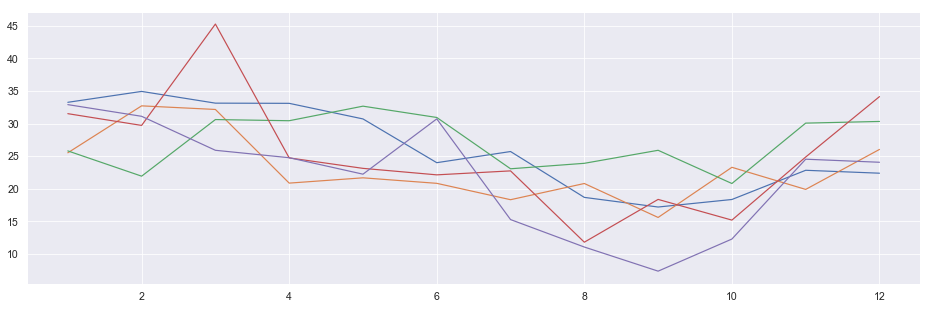

In [64]:
print(y2u)
plt.subplots(figsize=(16,5))
# plt.xticks(ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),'dt'].tolist(), rotation=90)
for yee in y2u:
    plt.plot(mgb.loc[(mgb['y']==yee) & (mgb['loca']=='강남구'),'m'],\
             mgb.loc[(mgb['y']==yee) & (mgb['loca']=='강남구'),'pm25_mean'])
    
    

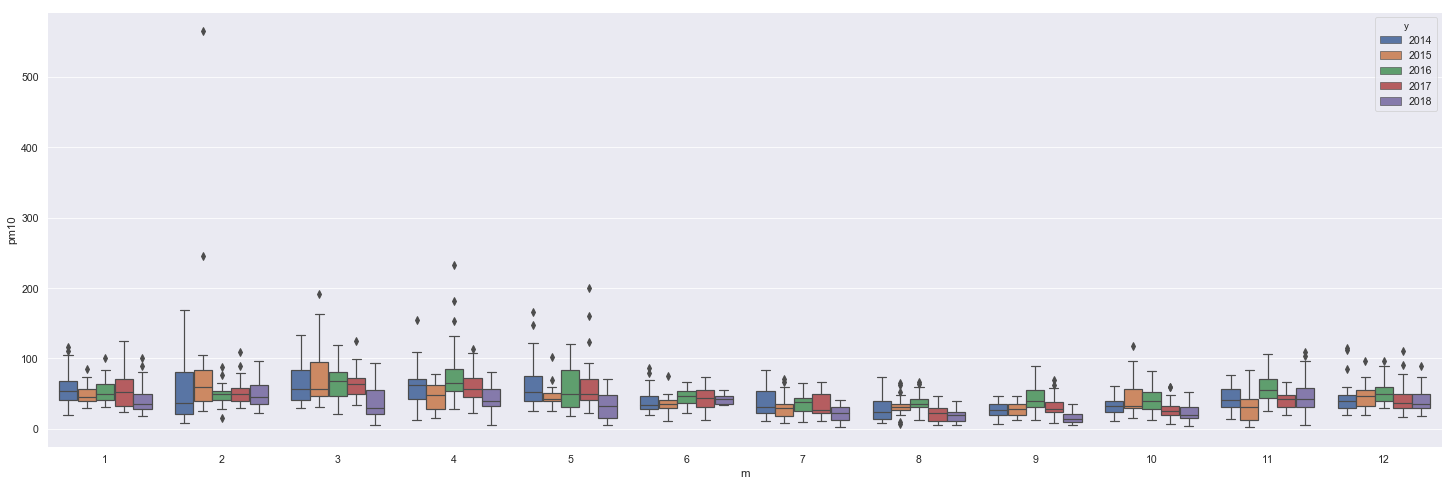

In [67]:
plt.subplots(figsize=(25,8))
b = sns.boxplot(data = ds[(ds['loca']=='강남구')],
                hue = 'y',
                x = 'm',
                y = 'pm10'                )

In [ ]:
med_dict = {}
min_dict = {}
max_dict = {}



<class 'pandas._libs.tslibs.timestamps.Timestamp'>


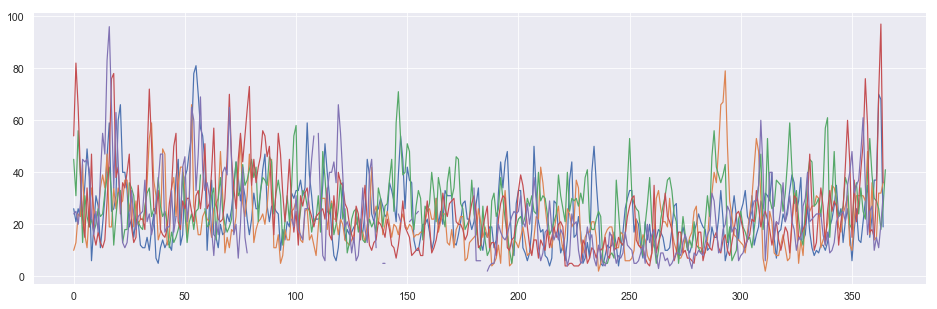

In [63]:
print(type(ds.dt[0]))
plt.subplots(figsize=(16,5))
# plt.xticks(ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),'dt'].tolist(), rotation=90)
for yee in y2u:
    plt.plot(ds.loc[(ds['dt'].dt.year==yee) & (ds['loca']=='강동구'),'day'],\
             ds.loc[(ds['dt'].dt.year==yee) & (ds['loca']=='강동구'),'pm25'])

In [201]:
print(ds.loc[(ds['dt'].dt.year==2017) & (ds['loca']=='강동구'),'dt'].shape)
print(ds.loc[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구'),'dt'].shape)

(365,)
(365,)


In [101]:
ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),:].sort_values('pm10',ascending=False).head()

,dt,loca,pm10,pm25
10316,2015-02-23,강남구,565.0,90.0
10291,2015-02-22,강남구,245.0,37.0
10964,2015-03-21,강남구,191.0,61.0
10989,2015-03-22,강남구,163.0,49.0
11189,2015-03-30,강남구,157.0,52.0


In [108]:
# Your data, with some additional elements deleted...
data = np.array(
[[  5., 22.57011604],
 [  6., 22.57408142],
 [  9., 22.56790352],
 [ 10., 22.56451225],
 [ 11., 22.56481743],
 [ 12., 22.55789757],
 [ 29., 22.55654716],
 [ 33., 22.56213379],
 [ 34., 22.5588932 ],
 [ 35., 22.54829407],
 [ 40., 22.55079269],
 [ 41., 22.55475616],
 [ 41., 22.54783821],
 [ 42., 22.55195618]])

x = data[:,0]
y = data[:,1]

# Difference from element to element in x
dx = x[1:]-x[:-1]

In [111]:
x[1:]

array([ 6.,  9., 10., 11., 12., 29., 33., 34., 35., 40., 41., 41., 42.])

In [112]:
x[:-1]

array([ 5.,  6.,  9., 10., 11., 12., 29., 33., 34., 35., 40., 41., 41.])

In [49]:
a = {}
a['layout'] = {}
a['layout'].update(title='kkk')

In [73]:
for i,v in enumerate(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']):
    print(i,v)

0 Jan
1 Feb
2 Mar
3 Apr
4 May
5 Jun
6 Jul
7 Aug
8 Sep
9 Oct
10 Nov
11 Dec


In [80]:
a = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
a[2:10]

('Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct')

In [79]:
for i in range(9):
    print(i)

0
1
2
3
4
5
6
7
8
